In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Drop unnecessary 'customerID' column
df.drop('customerID', axis=1, inplace=True)

In [7]:
# Handle numerical and categorical columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

In [8]:
# Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_19060\2237325872.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# Exploratory Data Analysis (EDA)

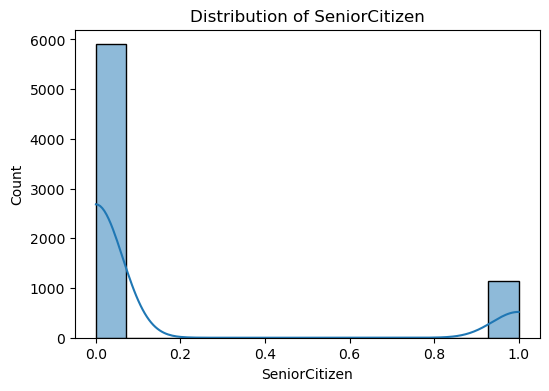

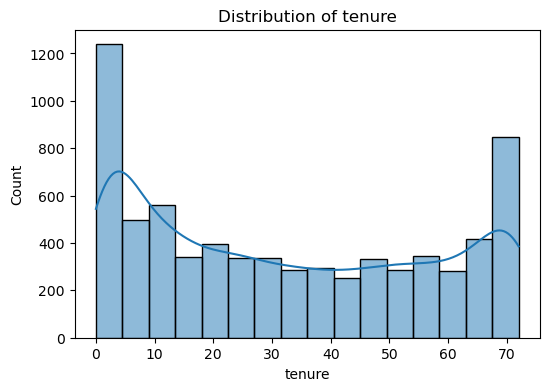

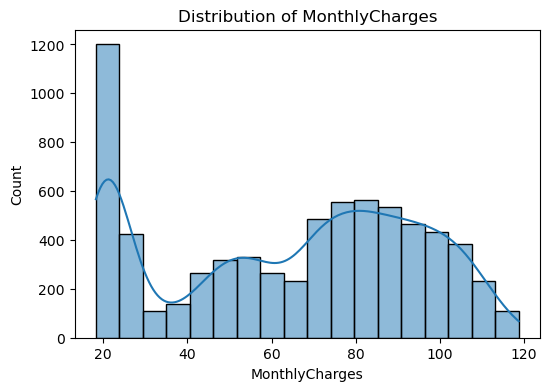

In [9]:
# Visualize distributions of numerical columns
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

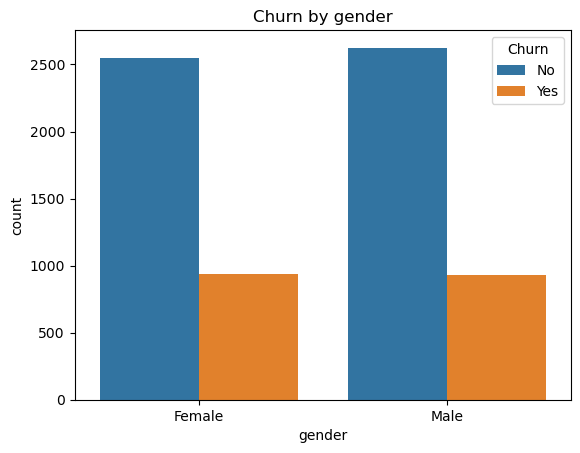

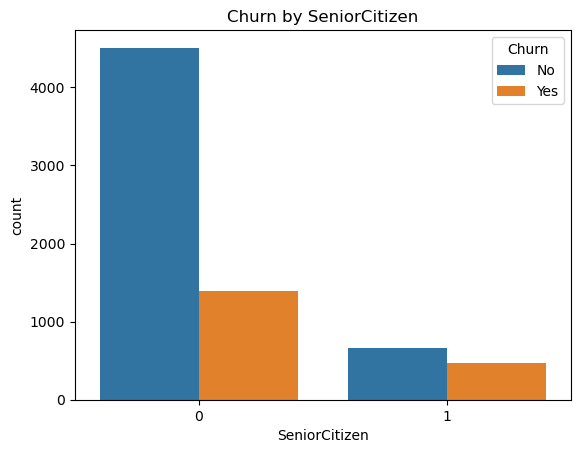

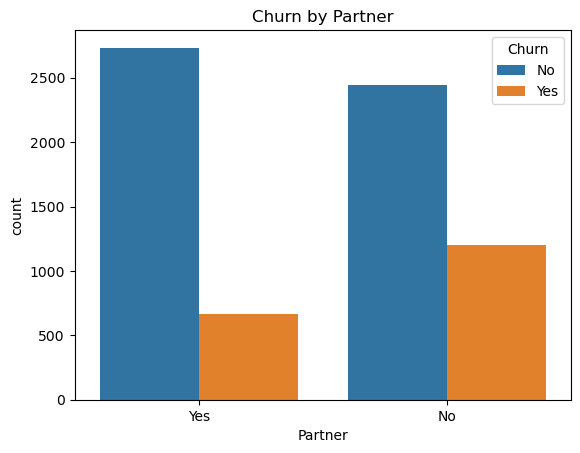

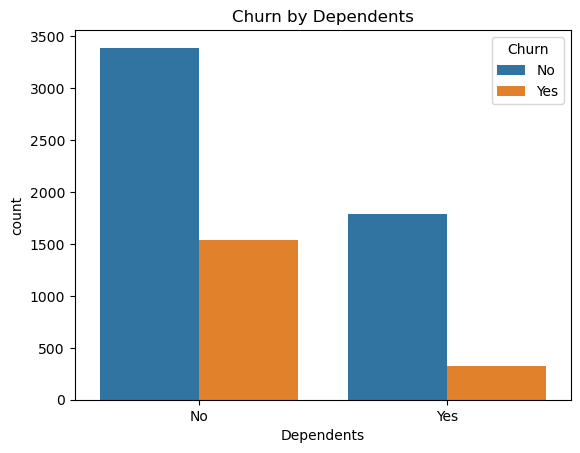

In [10]:
# Visualize categorical features with respect to churn
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f'Churn by {col}')
    plt.show()

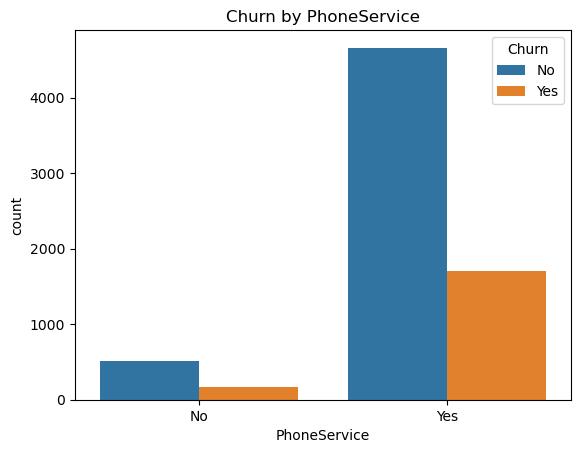

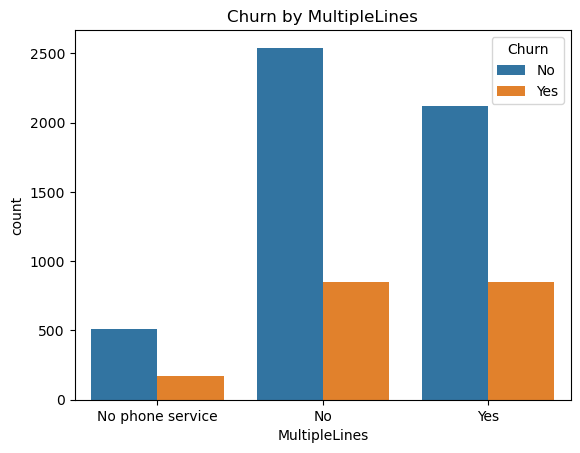

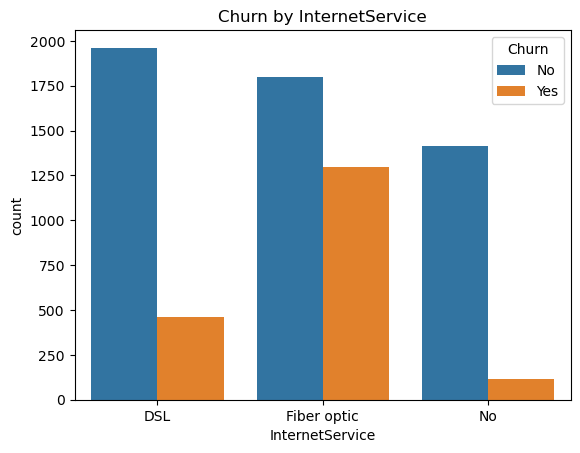

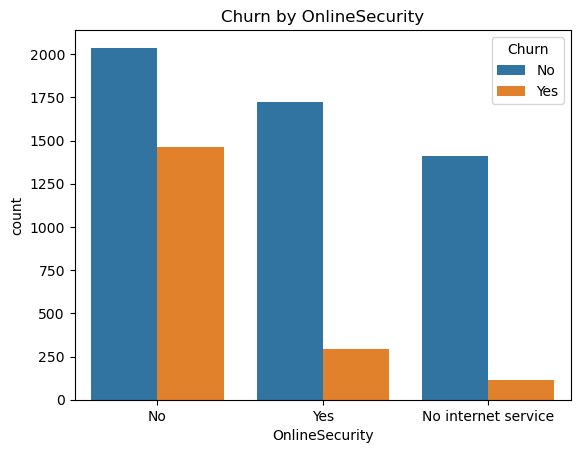

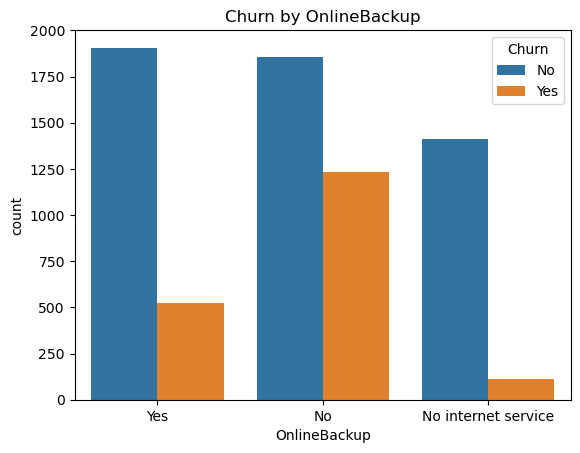

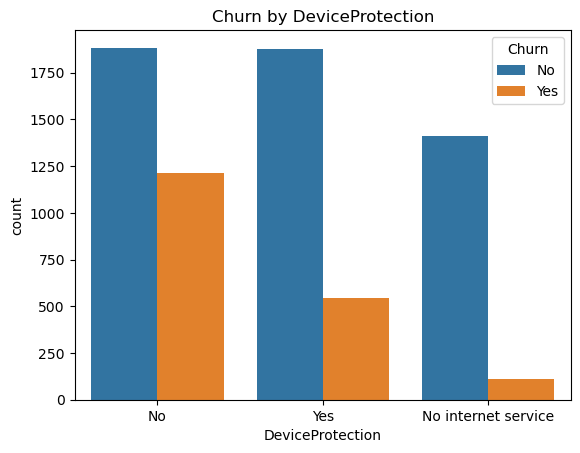

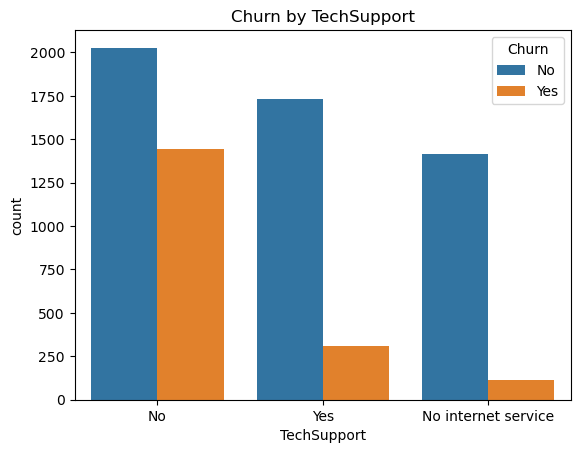

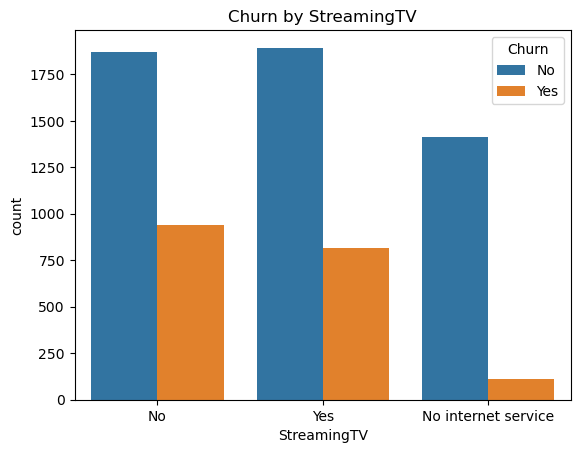

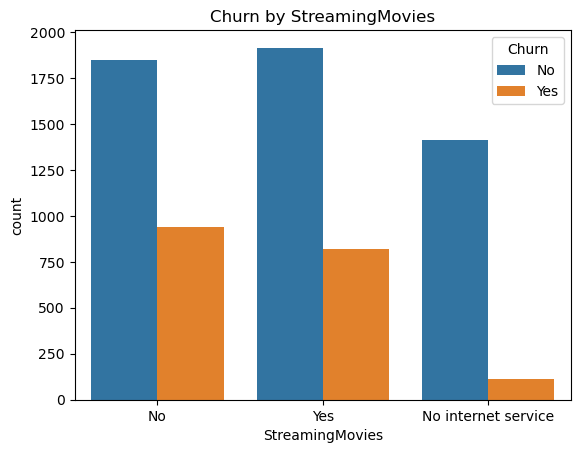

In [11]:
# Visualize service-related columns and churn
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies']
for service in service_columns:
    sns.countplot(x=service, data=df, hue='Churn')
    plt.title(f'Churn by {service}')
    plt.show()

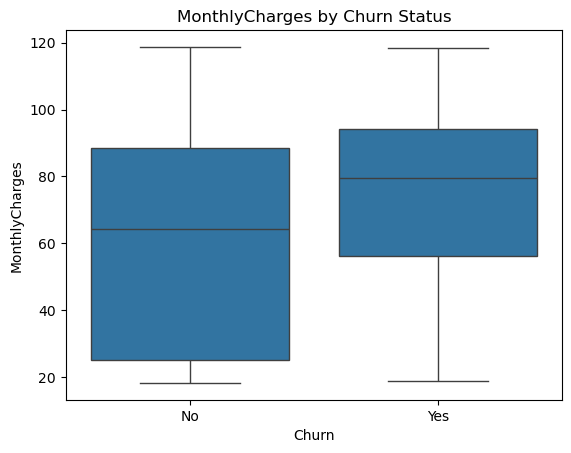

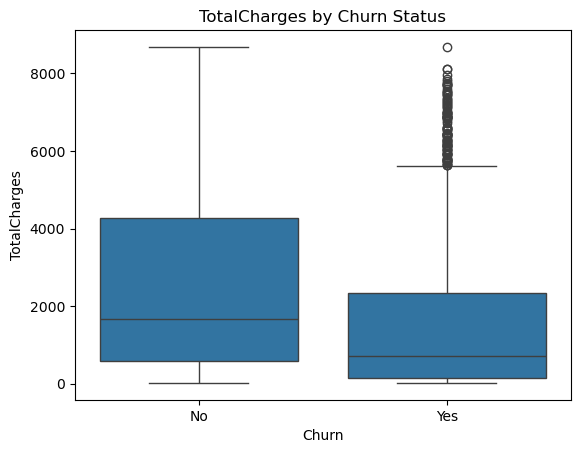

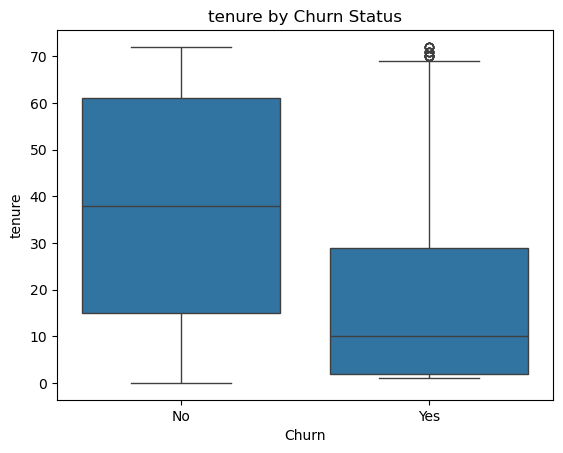

In [12]:
# Box plots for numerical features vs. churn
for col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn Status')
    plt.show()

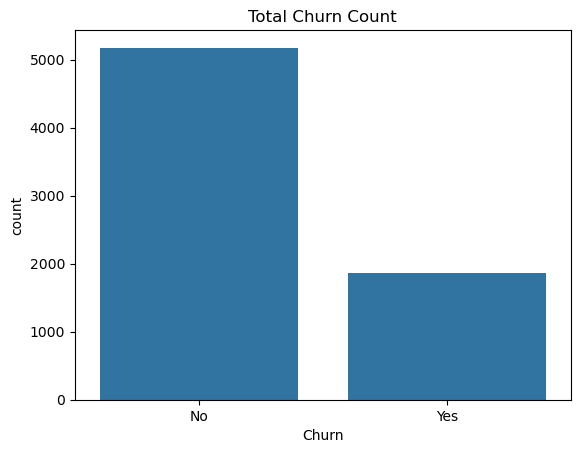

In [13]:
# Check class balance in the target
sns.countplot(x='Churn', data=df)
plt.title('Total Churn Count')
plt.show()

# Data Preprocessing

In [14]:
#Encode categorical columns
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [15]:
# Scale numerical columns
scaler = MinMaxScaler()
df[num_col] = scaler.fit_transform(df[num_col])

# Modeling

In [16]:
# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up Stratified K-Folds
stratifiedfold = StratifiedKFold(n_splits=3)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=stratifiedfold, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


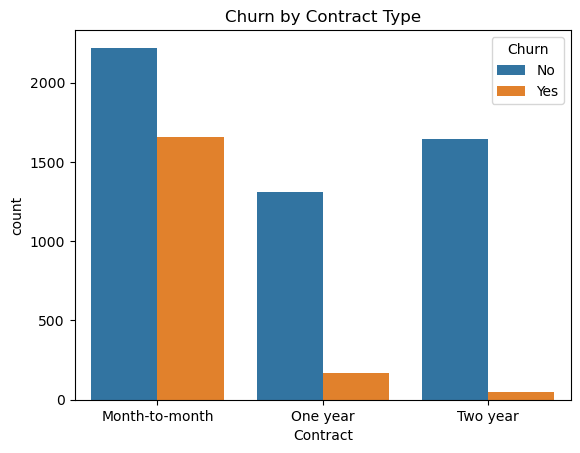

In [21]:
# Train the KNN model with the best parameters
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=43, weights='uniform')
knn_model.fit(X_train, y_train)

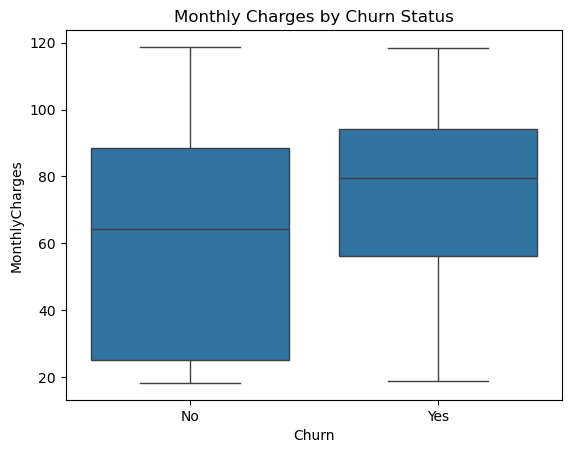

In [22]:
# Training set evaluation
y_train_pred = knn_model.predict(X_train)
print("Training Set Evaluation:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

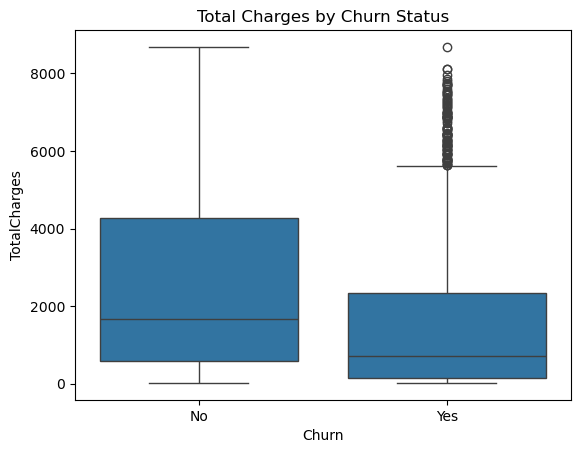

In [23]:
# Test set evaluation
y_test_pred = knn_model.predict(X_test)
print("Test Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))